Lab 3: Understanding Convolution and Correlation using Python

3.1 Understanding Convolution using python

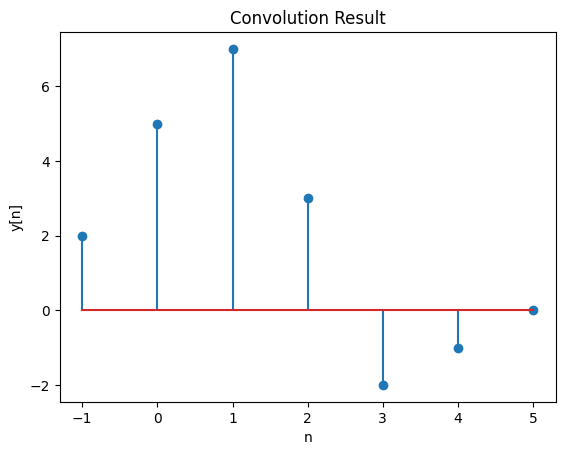

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 1]
h = [1, 2, 1, -1]

size = len(x) + len(h) - 1

x = np.concatenate([x, np.zeros(len(h))])
h = np.concatenate([h, np.zeros(len(x))])

output = np.zeros(size)

for n in range(size):
    for k in range(n + 1):
        output[n] += x[k] * h[n - k + 1]

# From Lowest Point of h(n) or x(n) to LowestPoint + ConvolutionSize
# -1,0,1,2,3,4,5 (Total Point = ConvSize = 7)

t = np.arange(-1, 6)  # Index of Convolution

plt.stem(t, output)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolution Result')
plt.show()


3.1 Understanding Correlation using python

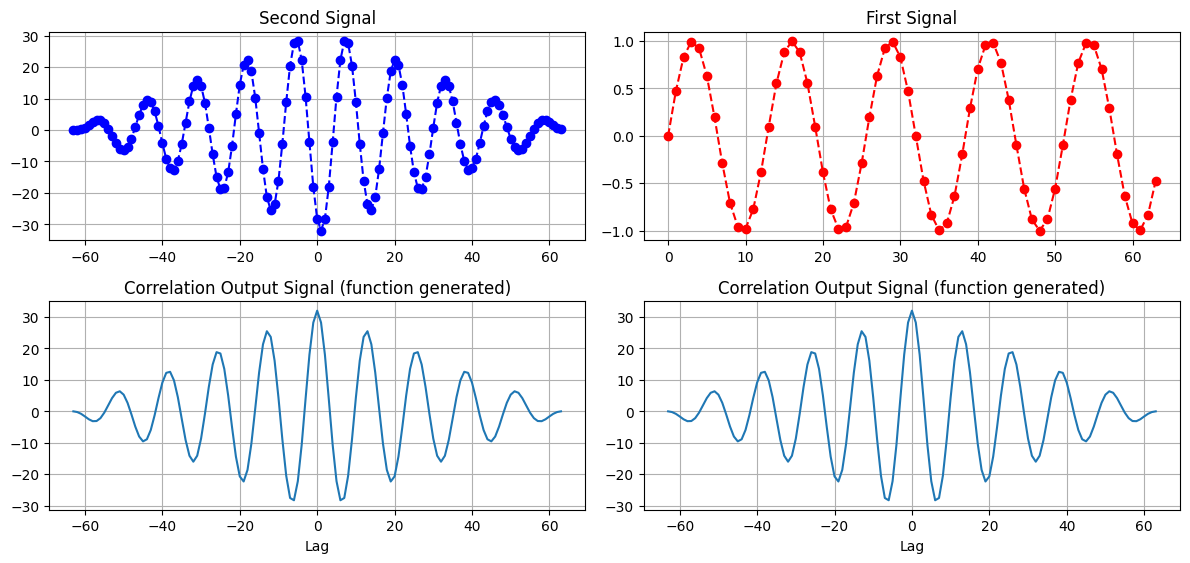

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Signal-1
fs = 64
tsamp = np.arange(0, 1, 1/fs)
raw_first_signal = np.sin(2 * np.pi * 5 * tsamp)

# Signal-2
fs2 = 64
tsamp2 = np.arange(0, 1, 1/fs2)
raw_second_signal = np.sin(2 * np.pi * 5 * tsamp2)

raw_first_signal_len = len(raw_first_signal)
raw_second_signal_len = len(raw_second_signal)
correlation_size = raw_first_signal_len + raw_second_signal_len - 1

# Making the length of two signals the same
first_signal = np.concatenate([raw_first_signal, np.zeros(raw_second_signal_len)])
second_signal = np.concatenate([raw_second_signal, np.zeros(raw_first_signal_len)])

output_signal = np.zeros(correlation_size)
lag = np.zeros(correlation_size)

size = len(second_signal)
lag_value = -raw_second_signal_len + 1


for i in range(1, raw_first_signal_len + raw_second_signal_len):
    for j in range(1, raw_first_signal_len + 1):
        if i - j + 1 > 0:
            output_signal[i - 1] += first_signal[j - 1] * second_signal[i - j]
        else:
            pass

nx = np.arange(-(raw_second_signal_len - 1), raw_first_signal_len)

# Function-generated Correlation
fun_gen_output_signal, lagg = np.correlate(raw_first_signal, raw_second_signal, mode='full'), np.arange(-(raw_first_signal_len - 1), raw_second_signal_len)

# Plotting...
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 2)
plt.plot(raw_first_signal, "r--o")
plt.title('First Signal')
plt.grid(True)

plt.subplot(3, 2, 1)
plt.plot(nx,output_signal, "b--o")
plt.title('Second Signal')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(lagg, fun_gen_output_signal)
plt.title('Correlation Output Signal (function generated)')
plt.xlabel('Lag')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(lagg, fun_gen_output_signal)
plt.title('Correlation Output Signal (function generated)')
plt.xlabel('Lag')
plt.grid(True)

plt.tight_layout()
plt.show()


3.3 Cross-correlation using Python

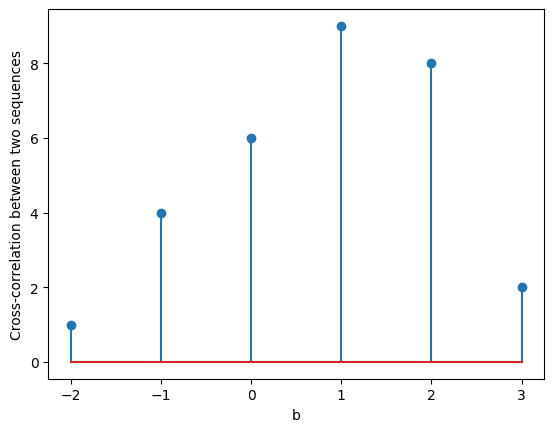

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 1, 2, 2])
y1 = np.array([1, 3, 1])
y2 = np.flip(y1)

n1 = len(x)
n2 = len(y2)

X = np.concatenate([x, np.zeros(n2)])
Y = np.concatenate([y2, np.zeros(n1)])

y = np.zeros(n1 + n2 - 1)

for i in range(1, n1 + n2):
    for j in range(1, n1 + 1):
        if i - j + 1 > 0:
            y[i - 1] += X[j - 1] * Y[i - j]
        else:
            pass

nx = np.arange(-(len(y1) - 1), len(x))

plt.stem(nx, y)
plt.xlabel('b')
plt.ylabel('Cross-correlation between two sequences')

plt.show()


3.4 Autocoorelation of a discrete time sequence

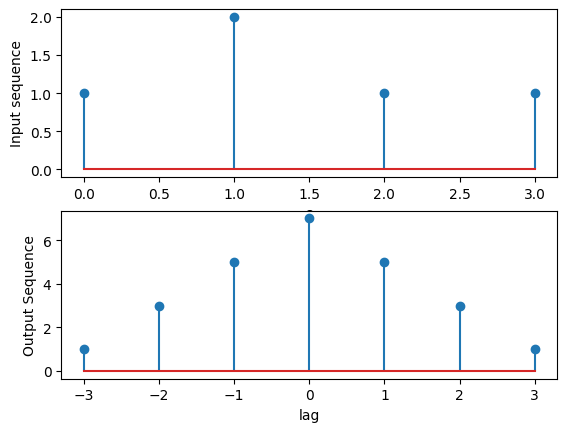

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 1, 1])
x1 = np.flip(x)

n = len(x)
X = np.concatenate([x, np.zeros(n)])
flip_x = np.concatenate([x1, np.zeros(n)])
y = np.zeros(2 * n - 1)

for i in range(1, 2 * n):
    for j in range(1, n + 1):
        if i - j + 1 > 0:
            y[i - 1] += X[j - 1] * flip_x[i - j]
        else:
            pass

# Plotting...
plt.subplot(2, 1, 1)
plt.stem(x)
plt.xlabel('a')
plt.ylabel('Input sequence')

nx = np.arange(-(len(x) - 1), len(x))

plt.subplot(2, 1, 2)
plt.stem(nx, y)
plt.xlabel('lag')
plt.ylabel('Output Sequence')

plt.show()
